In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Descriptive statistics 구하기: 4가지 지표 모두
## 2. Plotting: 히스토그램, 산점도, 
## 3. Neural net 돌리기
### --> VIX 유무 / days / 다른 parameter들
## 4. base model 돌리기 (회귀분석 등)
## 5. 성능평가 (MAE, RMSE, ...)
## 6. 결론

In [27]:
df_spx = pd.read_csv('spx.csv')
df_vix = pd.read_csv('vix.csv')
df_kospi = pd.read_csv('kospi.csv')
df_vkospi = pd.read_csv('vkospi.csv')

df_spx.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
df_vix.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
df_kospi.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
df_vkospi.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

df_us = pd.merge(left=df_spx, right=df_vix, how="inner", on="Date")
df_kr = pd.merge(left=df_kospi, right=df_vkospi, how="inner", on="Date")
df_us = df_us[::-1].reset_index(drop=True)
df_kr = df_kr[::-1].reset_index(drop=True)

df_us.columns = ['date', 'spx', 'vix']
df_kr.columns = ['date', 'kospi', 'vkospi']

In [28]:
df_us.head()

,date,spx,vix
0,2006-12-01,1396.71,11.66
1,2006-12-04,1409.12,11.23
2,2006-12-05,1414.76,11.27
3,2006-12-06,1412.90,11.33
4,2006-12-07,1407.29,12.67


In [29]:
def get_log_return(data):
    result = [0]
    for i in range(len(data) - 1):
        result.append(math.log(data[i + 1] / data[i]) * 100)
    return result

In [30]:
df_us['spx_log'] = get_log_return(df_us['spx'])
df_kr['kospi_log'] = get_log_return(df_kr['kospi'])

In [31]:
df_us['spx_log'].describe()

count    3774.000000
mean        0.031392
std         1.284946
min       -12.765214
25%        -0.390112
50%         0.073384
75%         0.574107
max        10.957196
Name: spx_log, dtype: float64

In [32]:
df_us['vix'].describe()

count    3774.000000
mean       19.901648
std         9.493520
min         9.140000
25%        13.680000
50%        17.230000
75%        22.955000
max        82.690000
Name: vix, dtype: float64

In [33]:
df_kr['kospi_log'].describe()

count    2044.000000
mean        0.019478
std         0.970706
min        -8.766976
25%        -0.399811
50%         0.052159
75%         0.515574
max         8.251268
Name: kospi_log, dtype: float64

In [34]:
df_kr['vkospi'].describe()

count    2044.000000
mean       16.107138
std         6.146424
min         9.720000
25%        12.680000
50%        14.220000
75%        17.145000
max        69.240000
Name: vkospi, dtype: float64

In [35]:
df_kr

,date,kospi,vkospi,kospi_log
0,2013-08-06,1906.62,14.98,0.000000
1,2013-08-07,1878.33,15.35,-1.494896
2,2013-08-08,1883.97,14.96,0.299817
3,2013-08-09,1880.71,14.38,-0.173189
4,2013-08-12,1884.83,14.72,0.218827
...,...,...,...,...
2039,2021-11-24,2994.29,16.27,-0.101475
2040,2021-11-25,2980.27,16.16,-0.469324
2041,2021-11-26,2936.44,18.04,-1.481594
2042,2021-11-29,2909.32,20.92,-0.927859


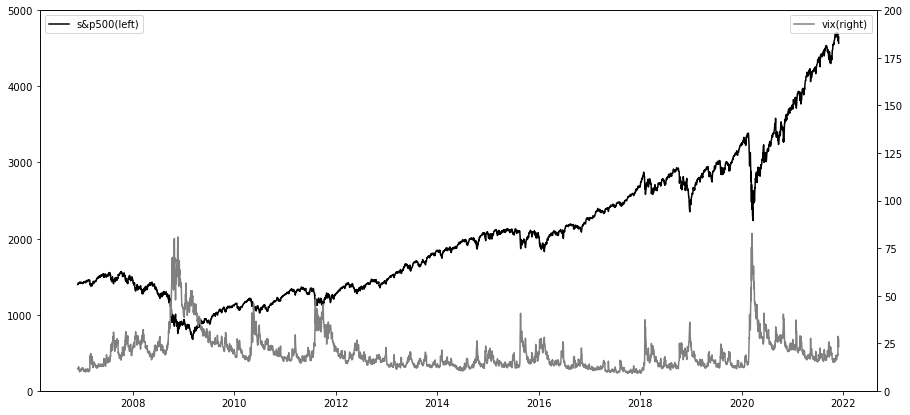

In [36]:
import datetime as dt

spx_prices = df_us['spx'].tolist()
vix_prices = df_us['vix'].tolist()
x = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df_us['date'].tolist()]

fig, ax1 = plt.subplots()

ax1.plot(x, spx_prices, color='black', label='s&p500(left)')
ax1.set_ylim([0, 5000])

ax2 = ax1.twinx()
ax2.plot(x, vix_prices, color='gray', label='vix(right)')
ax2.set_ylim([0, 200])

fig.set_size_inches(15, 7)

ax1.legend()
ax2.legend()
plt.show()

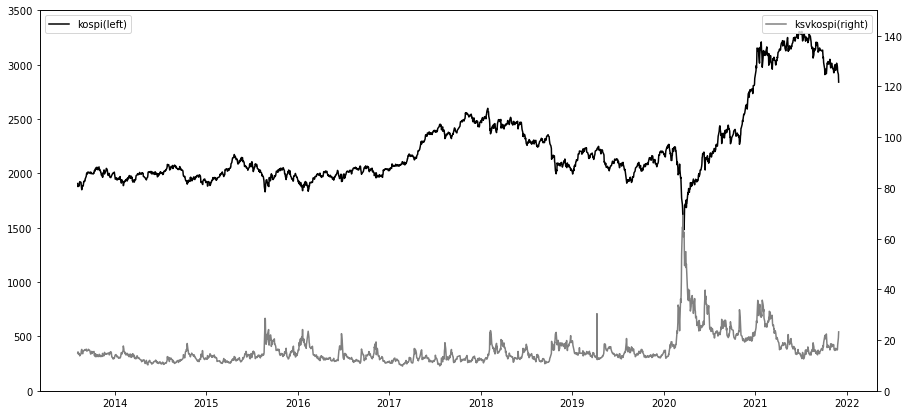

In [42]:
kospi_prices = df_kr['kospi'].tolist()
vkospi_prices = df_kr['vkospi'].tolist()
x = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df_kr['date'].tolist()]

fig, ax1 = plt.subplots()

ax1.plot(x, kospi_prices, color='black', label='kospi(left)')
ax1.set_ylim([0, 3500])

ax2 = ax1.twinx()
ax2.plot(x, vkospi_prices, color='gray', label='ksvkospi(right)')
ax2.set_ylim([0, 150])

fig.set_size_inches(15, 7)

ax1.legend()
ax2.legend()
plt.show()

In [13]:
df_us.drop(['spx'], axis=1, inplace=True)
df_kr.drop(['kospi'], axis=1, inplace=True)
df_us.drop([0], inplace=True)
df_kr.drop([0], inplace=True)
df_us.reset_index(drop=True, inplace=True)
df_kr.reset_index(drop=True, inplace=True)

In [14]:
df_us

,date,vix,spx_log
0,2006-12-04,11.23,0.884593
1,2006-12-05,11.27,0.399451
2,2006-12-06,11.33,-0.131558
3,2006-12-07,12.67,-0.397846
4,2006-12-08,12.07,0.181035
...,...,...,...
3768,2021-11-23,19.38,0.165357
3769,2021-11-24,18.58,0.229127
3770,2021-11-26,28.62,-2.298704
3771,2021-11-29,22.96,1.311386


(array([ 59., 289., 380., 370., 247., 160., 100.,  84.,  58.,  47.,  42.,
         34.,  26.,  23.,  22.,  14.,  15.,   8.,  10.,   9.,   7.,   9.,
          7.,   4.,   0.,   3.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          2.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([ 9.72  , 10.9104, 12.1008, 13.2912, 14.4816, 15.672 , 16.8624,
        18.0528, 19.2432, 20.4336, 21.624 , 22.8144, 24.0048, 25.1952,
        26.3856, 27.576 , 28.7664, 29.9568, 31.1472, 32.3376, 33.528 ,
        34.7184, 35.9088, 37.0992, 38.2896, 39.48  , 40.6704, 41.8608,
        43.0512, 44.2416, 45.432 , 46.6224, 47.8128, 49.0032, 50.1936,
        51.384 , 52.5744, 53.7648, 54.9552, 56.1456, 57.336 , 58.5264,
        59.7168, 60.9072, 62.0976, 63.288 , 64.4784, 65.6688, 66.8592,
        68.0496, 69.24  ]),
 <BarContainer object of 50 artists>)

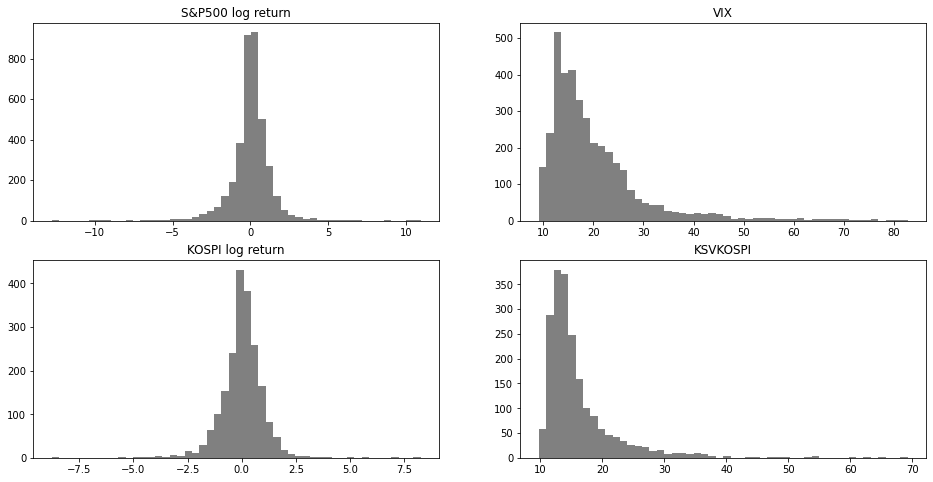

In [41]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1).set_title('S&P500 log return')
bins = 50
color = 'gray'
plt.hist(df_us['spx_log'], bins=bins, color=color)
plt.subplot(2, 2, 2).set_title('VIX')
plt.hist(df_us['vix'], bins=bins, color=color)
plt.subplot(2, 2, 3).set_title('KOSPI log return')
plt.hist(df_kr['kospi_log'], bins=bins, color=color)
plt.subplot(2, 2, 4).set_title('KSVKOSPI')
plt.hist(df_kr['vkospi'], bins=bins, color=color)

Text(0, 0.5, 'S&P500 log return')

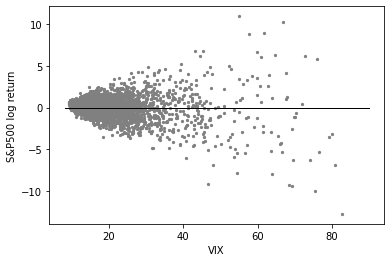

In [43]:
s=5
lw=1
plt.scatter(df_us['vix'], df_us['spx_log'], color=color, s=s)
plt.plot([8, 90], [0, 0], color='black', lw=lw)
plt.xlabel('VIX')
plt.ylabel('S&P500 log return')

Text(0, 0.5, 'KOSPI log return')

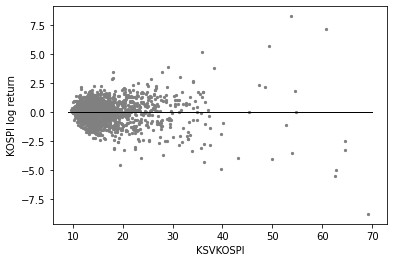

In [44]:
plt.scatter(df_kr['vkospi'], df_kr['kospi_log'], color=color, s=s)
plt.plot([9, 70], [0, 0], color='black', lw=lw)

plt.xlabel('KSVKOSPI')
plt.ylabel('KOSPI log return')

In [18]:
def create_autoregressive_df(input_df, target_columns=[], days=10):
    if len(target_columns) == 0:
        target_columns = input_df.columns
    
    data_len = len(input_df)
    df = input_df.copy()
    for target in target_columns:
        original_data = df[target].tolist()
        for i in range(days, 0, -1):
            column_name = '{}_{}dbefore'.format(target, i)
            modified_data = [None] * i + original_data[:data_len - i]
            df[column_name] = modified_data
        df.drop([target], axis=1, inplace=True)
        df[target] = original_data
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [19]:
df_kr.head()

,date,vkospi,kospi_log
0,2013-08-07,15.35,-1.494896
1,2013-08-08,14.96,0.299817
2,2013-08-09,14.38,-0.173189
3,2013-08-12,14.72,0.218827
4,2013-08-13,14.26,1.485074


In [22]:
def get_dataset(df, x_columns, y_column, train_set_ratio=0.8):
    last_train_index = int(len(df) * train_set_ratio)
    train = df[:last_train_index]
    test = df[last_train_index:]
    x_train = train[x_columns]
    y_train = train[y_column]
    x_test = test[x_columns]
    y_test = test[y_column]
    
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return x_train, y_train, x_test, y_test

## Grid search

In [23]:
solver = 'adam'
activation = 'relu'
days = [3, 5, 7, 10, 15]
alphas = [0.0005, 0.001, 0.005, 0.01]
hidden_layers = [(5), (10), (20), (50), (100), (5, 5), (10, 10), (20, 20), (50, 50), (100, 100),
                 (5, 5, 5), (5, 10, 5), (10, 10, 10), (20, 20, 20), (20, 50, 20), (50, 50, 50)]

repeat = 5

num_iter = len(days) * len(alphas) * len(hidden_layers)
cur_iter = 1

min_mae = 99999
best_model = {}

for d in days:
    df_auto_us = create_autoregressive_df(df_us, ['spx_log', 'vix'], days=d)
    x_columns = df_auto_us.columns.tolist()
    for c in ['date', 'spx_log', 'vix']:
        x_columns.remove(c)
    x_train, y_train, x_test, y_test = get_dataset(df_auto_us, x_columns, 'spx_log')
    for a in alphas:
        for h in hidden_layers:
            mlp = MLPRegressor(hidden_layer_sizes=h, activation=activation, solver=solver, alpha=a, max_iter=10000)
            mae_list = []
            score_list = []
            for i in range(repeat):
                mlp.fit(x_train, y_train)
                predict_test = mlp.predict(x_test)
                mae =  mean_absolute_error(predict_test, y_test)
#                 print(mae)
                mae_list.append(mae)
                score_list.append(mlp.score(x_test, y_test))
            mae_avg = sum(mae_list) / repeat
            score_avg = sum(score_list) / repeat
            print("{} / {} ... day: {}, alpha: {}, hidden_layer: {}, SCORE: {}, MAE: {}".format(
                cur_iter, num_iter, d, a, h, score_avg, mae_avg))
            if mae_avg < min_mae:
                print("UPDATING MINIMUM...")
                min_mae = mae_avg
                best_model['day'] = d
                best_model['alpha'] = a
                best_model['hidden_layer'] = h
            cur_iter += 1

print(best_model)
print('minimum mae: {}'.format(min_mae))

1 / 320 ... day: 3, alpha: 0.0005, hidden_layer: 5, SCORE: 0.009560982060434408, MAE: 0.8606152944306326
UPDATING MINIMUM...
2 / 320 ... day: 3, alpha: 0.0005, hidden_layer: 10, SCORE: 0.008954301708381985, MAE: 0.8611867539713446
3 / 320 ... day: 3, alpha: 0.0005, hidden_layer: 20, SCORE: 0.002406810881696764, MAE: 0.8624219649195062
4 / 320 ... day: 3, alpha: 0.0005, hidden_layer: 50, SCORE: 0.009824980988103093, MAE: 0.8599007569962153
UPDATING MINIMUM...
5 / 320 ... day: 3, alpha: 0.0005, hidden_layer: 100, SCORE: -0.006157020754602583, MAE: 0.8620509656474677
6 / 320 ... day: 3, alpha: 0.0005, hidden_layer: (5, 5), SCORE: 0.0061281412754623284, MAE: 0.8608456480084771
7 / 320 ... day: 3, alpha: 0.0005, hidden_layer: (10, 10), SCORE: -0.004311951515519552, MAE: 0.8623676149191157
8 / 320 ... day: 3, alpha: 0.0005, hidden_layer: (20, 20), SCORE: -0.02016144633376642, MAE: 0.866983400132462
9 / 320 ... day: 3, alpha: 0.0005, hidden_layer: (50, 50), SCORE: -0.10204517798323316, MAE: 0

74 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (100, 100), SCORE: -0.46566884397925074, MAE: 0.994288932985423
75 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (5, 5, 5), SCORE: -0.11594621411505708, MAE: 0.8750567220159228
76 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (5, 10, 5), SCORE: -0.04754804519116331, MAE: 0.8657691423712738
77 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (10, 10, 10), SCORE: -0.260794736901733, MAE: 0.9074465398211167
78 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (20, 20, 20), SCORE: -0.4700324854448702, MAE: 0.9658407016664107
79 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (20, 50, 20), SCORE: -0.46304963682194594, MAE: 1.000372076934547
80 / 320 ... day: 5, alpha: 0.0005, hidden_layer: (50, 50, 50), SCORE: -0.40099441067678665, MAE: 1.009354562846482
81 / 320 ... day: 5, alpha: 0.001, hidden_layer: 5, SCORE: -0.006508273807400222, MAE: 0.8596437711748413
82 / 320 ... day: 5, alpha: 0.001, hidden_layer: 10, SCORE: -0.006191021929643848, MAE: 

148 / 320 ... day: 7, alpha: 0.001, hidden_layer: 50, SCORE: -0.17658232026654286, MAE: 0.9170439821772594
149 / 320 ... day: 7, alpha: 0.001, hidden_layer: 100, SCORE: -0.2656610590601459, MAE: 0.9322757667862772
150 / 320 ... day: 7, alpha: 0.001, hidden_layer: (5, 5), SCORE: -0.14102725981699044, MAE: 0.8885034800147341
151 / 320 ... day: 7, alpha: 0.001, hidden_layer: (10, 10), SCORE: -0.30382316121673647, MAE: 0.9162005992695704
152 / 320 ... day: 7, alpha: 0.001, hidden_layer: (20, 20), SCORE: -0.298008673736975, MAE: 0.9440388997081979
153 / 320 ... day: 7, alpha: 0.001, hidden_layer: (50, 50), SCORE: -0.6037821015969683, MAE: 1.0319416755007238
154 / 320 ... day: 7, alpha: 0.001, hidden_layer: (100, 100), SCORE: -0.5319906467175122, MAE: 1.0109808339985717
155 / 320 ... day: 7, alpha: 0.001, hidden_layer: (5, 5, 5), SCORE: -0.15484655634802008, MAE: 0.886361902368702
156 / 320 ... day: 7, alpha: 0.001, hidden_layer: (5, 10, 5), SCORE: -0.22542539979039006, MAE: 0.90352206866780

222 / 320 ... day: 10, alpha: 0.001, hidden_layer: (20, 20, 20), SCORE: -0.5624522982709844, MAE: 1.0090138659353705
223 / 320 ... day: 10, alpha: 0.001, hidden_layer: (20, 50, 20), SCORE: -0.7859788935022866, MAE: 1.0590930703133072
224 / 320 ... day: 10, alpha: 0.001, hidden_layer: (50, 50, 50), SCORE: -0.7742909523024469, MAE: 1.09006061211966
225 / 320 ... day: 10, alpha: 0.005, hidden_layer: 5, SCORE: -0.22095427367662207, MAE: 0.8970434635430209
226 / 320 ... day: 10, alpha: 0.005, hidden_layer: 10, SCORE: -0.17961121562447135, MAE: 0.9088721999276748
227 / 320 ... day: 10, alpha: 0.005, hidden_layer: 20, SCORE: -0.2607686039471855, MAE: 0.9383501966755748
228 / 320 ... day: 10, alpha: 0.005, hidden_layer: 50, SCORE: -0.39678163305368347, MAE: 0.9806316614578412
229 / 320 ... day: 10, alpha: 0.005, hidden_layer: 100, SCORE: -0.456859290419595, MAE: 0.9987796081857121
230 / 320 ... day: 10, alpha: 0.005, hidden_layer: (5, 5), SCORE: -0.14865411788537486, MAE: 0.8832470380393195
23

296 / 320 ... day: 15, alpha: 0.005, hidden_layer: (20, 20), SCORE: -0.54702237179287, MAE: 0.984900519930114
297 / 320 ... day: 15, alpha: 0.005, hidden_layer: (50, 50), SCORE: -0.7690007172416597, MAE: 1.0927402651688076
298 / 320 ... day: 15, alpha: 0.005, hidden_layer: (100, 100), SCORE: -0.6916538167407715, MAE: 1.0684576857162904
299 / 320 ... day: 15, alpha: 0.005, hidden_layer: (5, 5, 5), SCORE: -0.21414072390309044, MAE: 0.9046183164542523
300 / 320 ... day: 15, alpha: 0.005, hidden_layer: (5, 10, 5), SCORE: -0.35568078267216513, MAE: 0.9146391793441824
301 / 320 ... day: 15, alpha: 0.005, hidden_layer: (10, 10, 10), SCORE: -0.6668589728381308, MAE: 0.9843479730949356
302 / 320 ... day: 15, alpha: 0.005, hidden_layer: (20, 20, 20), SCORE: -0.6145900567137876, MAE: 0.9925815586447142
303 / 320 ... day: 15, alpha: 0.005, hidden_layer: (20, 50, 20), SCORE: -0.7728530217377827, MAE: 1.0554575161766135
304 / 320 ... day: 15, alpha: 0.005, hidden_layer: (50, 50, 50), SCORE: -0.82367

## Define architecture

In [181]:
mlp = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=0.01, max_iter=10000)
# mlp = LinearRegression()

In [182]:
df_auto_us = create_autoregressive_df(df_us, ['spx_log', 'vix'], days=3)
df_auto_kr = create_autoregressive_df(df_kr, ['kospi_log', 'vkospi'], days=3)

In [183]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()

## 1. US / With VIX / 5 days

In [196]:
x_columns = df_auto_us.columns.tolist()
for d in ['date', 'spx_log', 'vix']:
    x_columns.remove(d)
x_train, y_train, x_test, y_test = get_dataset(df_auto_us, x_columns, 'spx_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 1.1464334844039075, MAE: 0.7557727435877007, R2: 0.14794780396528828
Out-of-sample, RMSE: 1.1464334844039075, MAE: 0.8967597766502304, R2: -0.1726674419616483


In [199]:
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 1.1464334844039075, MAE: 0.7557727435877007, R2: 0.14794780396528828
Out-of-sample, RMSE: 1.5641436538721223, MAE: 0.8967597766502304, R2: -0.1726674419616483


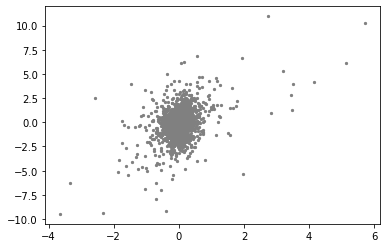

In [197]:
plt.scatter(predict_train, y_train, s=s, color=color)

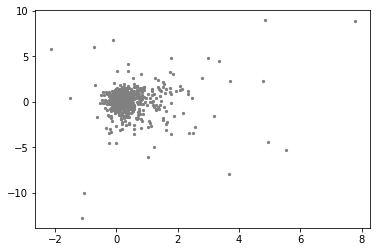

In [198]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. US / Without VIX / 5 days

In [203]:
x_columns = df_auto_us.columns.tolist()
for d in ['date', 'spx_log', 'vix']:
    x_columns.remove(d)
x_columns = x_columns[:5]
x_train, y_train, x_test, y_test = get_dataset(df_auto_us, x_columns, 'spx_log')


mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 1.135347222375632, MAE: 0.7554946553850423, R2: 0.16434718733404974
Out-of-sample, RMSE: 1.6711853582543346, MAE: 0.976845382718445, R2: -0.33866169842876737


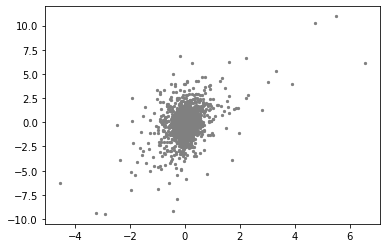

In [204]:
plt.scatter(predict_train, y_train, s=s, color=color)

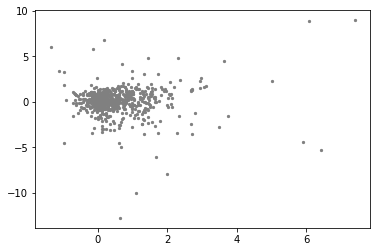

In [205]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. KR / With VIX / 5 days

In [227]:
x_columns = df_auto_kr.columns.tolist()
for d in ['date', 'kospi_log', 'vkospi']:
    x_columns.remove(d)
x_train, y_train, x_test, y_test = get_dataset(df_auto_kr, x_columns, 'kospi_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, MAE: {}, R2: {}'.format(mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, MAE: {}, R2: {}'.format(mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, MAE: 0.5925296680762597, R2: 0.12504678768317834
Out-of-sample, MAE: 0.8981914097023694, R2: -0.04514467677213019


In [230]:
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 0.8557858774725169, MAE: 0.5925296680762597, R2: 0.12504678768317834
Out-of-sample, RMSE: 1.1869729993772713, MAE: 0.8981914097023694, R2: -0.04514467677213019


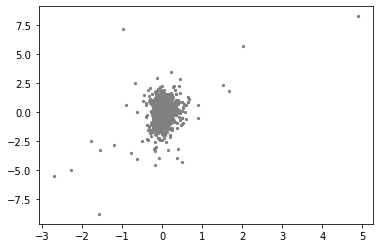

In [231]:
plt.scatter(predict_train, y_train, s=s, color=color)

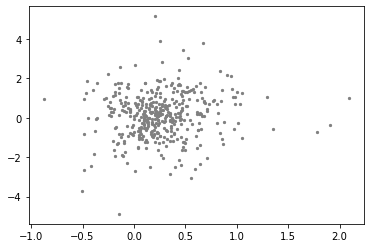

In [232]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. KR / Without VIX / 5 days

In [239]:
x_columns = df_auto_kr.columns.tolist()
for d in ['date', 'kospi_log', 'vkospi']:
    x_columns.remove(d)
x_columns = x_columns[:5]
x_train, y_train, x_test, y_test = get_dataset(df_auto_kr, x_columns, 'kospi_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 0.8390151773457164, MAE: 0.589378816779214, R2: 0.15900341267826656
Out-of-sample, RMSE: 1.2673570082671075, MAE: 0.9633375524219578, R2: -0.1914962352918066


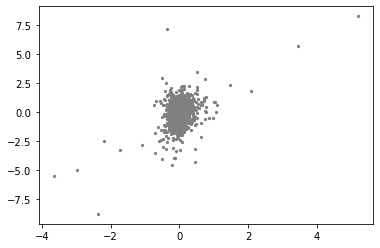

In [240]:
plt.scatter(predict_train, y_train, s=s, color=color)

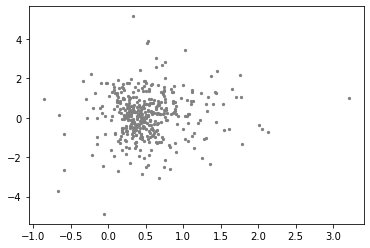

In [241]:
plt.scatter(predict_test, y_test, s=s, color=color)

## ETC

In [37]:
# mlp.fit(x_train, abs(y_train))
# mlp.score(x_test, abs(y_test))

In [38]:
# plt.scatter(mlp.predict(x_test), abs(y_test))

## Define architecture (Linear Regression)

In [242]:
mlp = LinearRegression()

## 1. US / With VIX / 5 days

In [243]:
x_columns = df_auto_us.columns.tolist()
for d in ['date', 'spx_log', 'vix']:
    x_columns.remove(d)
x_train, y_train, x_test, y_test = get_dataset(df_auto_us, x_columns, 'spx_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 1.2306775691893672, MAE: 0.7895467779896845, R2: 0.01812309318609362
Out-of-sample, RMSE: 1.4455433869268839, MAE: 0.8519766511268922, R2: -0.0015758771486333867


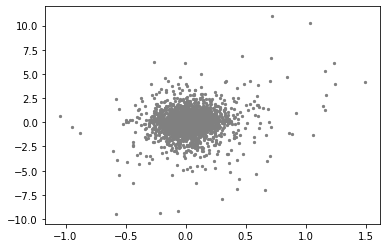

In [244]:
plt.scatter(predict_train, y_train, s=s, color=color)

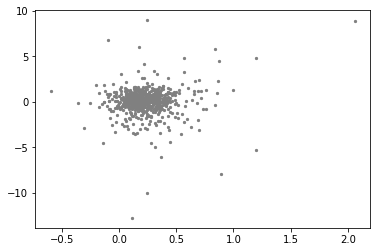

In [245]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. US / Without VIX / 5 days

In [246]:
x_columns = df_auto_us.columns.tolist()
for d in ['date', 'spx_log', 'vix']:
    x_columns.remove(d)
x_columns = x_columns[:5]
x_train, y_train, x_test, y_test = get_dataset(df_auto_us, x_columns, 'spx_log')


mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 1.2317945589423942, MAE: 0.7888869804356899, R2: 0.016339938627029538
Out-of-sample, RMSE: 1.434917400368381, MAE: 0.8477555036930784, R2: 0.013094889968950696


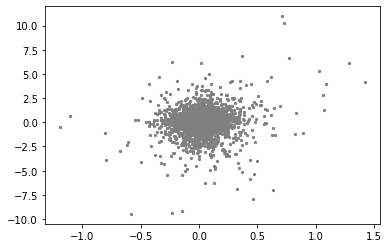

In [247]:
plt.scatter(predict_train, y_train, s=s, color=color)

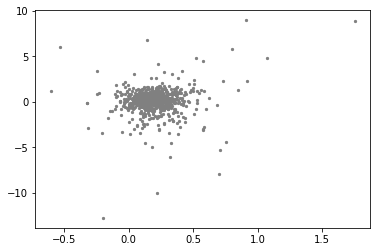

In [248]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. KR / With VIX / 5 days

In [249]:
x_columns = df_auto_kr.columns.tolist()
for d in ['date', 'kospi_log', 'vkospi']:
    x_columns.remove(d)
x_train, y_train, x_test, y_test = get_dataset(df_auto_kr, x_columns, 'kospi_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 0.9025693930178269, MAE: 0.6075923003573306, R2: 0.026769292134375622
Out-of-sample, RMSE: 1.1953641431636102, MAE: 0.9116091080159364, R2: -0.059973924413960544


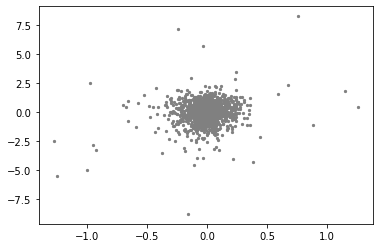

In [250]:
plt.scatter(predict_train, y_train, s=s, color=color)

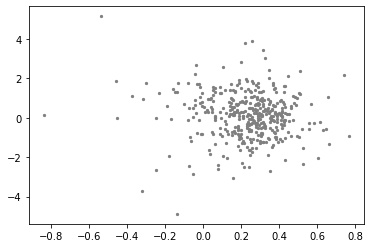

In [251]:
plt.scatter(predict_test, y_test, s=s, color=color)

## 1. KR / Without VIX / 5 days

In [252]:
x_columns = df_auto_kr.columns.tolist()
for d in ['date', 'kospi_log', 'vkospi']:
    x_columns.remove(d)
x_columns = x_columns[:5]
x_train, y_train, x_test, y_test = get_dataset(df_auto_kr, x_columns, 'kospi_log')

mlp.fit(x_train, y_train)
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print('In-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_train, y_train, squared=False), mean_absolute_error(predict_train, y_train), mlp.score(x_train, y_train)))
print('Out-of-sample, RMSE: {}, MAE: {}, R2: {}'.format(mean_squared_error(predict_test, y_test, squared=False), mean_absolute_error(predict_test, y_test), mlp.score(x_test, y_test)))

In-sample, RMSE: 0.9048899855379076, MAE: 0.6080020306159498, R2: 0.021758319476827492
Out-of-sample, RMSE: 1.1857702183326013, MAE: 0.9033575616765873, R2: -0.04302762222101464


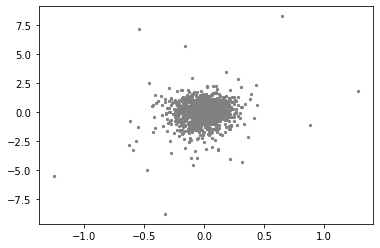

In [253]:
plt.scatter(predict_train, y_train, s=s, color=color)

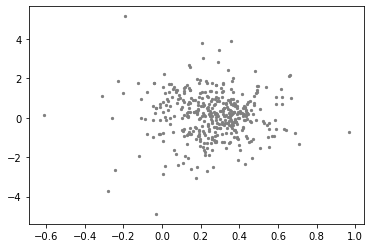

In [254]:
plt.scatter(predict_test, y_test, s=s, color=color)